In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
match = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches1.csv')


In [ ]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deliveries1.csv')

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
total_score_df= delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df                       #calculates the sum of the 'total_runs' column within each group and resets
                                                            #the index of the resulting DataFrame.

<ipython-input-8-461e16b6f9e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df= delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [ ]:
total_score_df=total_score_df[total_score_df['inning']==1] #The updated code filters the DataFrame total_score_df to only
                                                           #include rows where the value in the 'inning' column is equal to 1.


In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

#performs a merge operation between two DataFrames, match and total_score_df[['match_id','total_runs']],
#based on matching values between the 'id' column in the match DataFrame and the 'match_id' column in the
#total_score_df DataFrame.

In [ ]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = [  #The teams list contains the names of eight teams participating in the Indian Premier League (IPL):
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

#The provided code updates the team names in the match_df DataFrame. It replaces the old team names with the updated team names.

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]

#print(match_df)
match_df = match_df[match_df['team2'].isin(teams)]

#The provided code filters the match_df DataFrame to only include rows where the values in the
#'team1' and 'team2' columns are present in the teams list.

In [ ]:
match_df.shape

(641, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]   #match_df DataFrame to only include rows where the value in the 'dl_applied'
                                                   #column is equal to 0. This condition ensures that only matches where the
                                                   #Duckworth-Lewis (DL) method was not applied are included in the DataFrame

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']] #The updated code selects a subset of columns from the match_df
                                                          #DataFrame, including 'match_id', 'city', 'winner', and 'total_runs'.
                                                             #The resulting DataFrame will only contain these selected columns

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id') # performs a merge operation between the match_df DataFrame and the
                                                     #delivery DataFrame based on matching values in the 'match_id' column.
    #The resulting DataFrame will combine the information from both DataFrames into a single DataFrame called delivery_df.
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]  #delivery_df DataFrame to only include rows where the value in the
                                                         #'inning' column is equal to 2.

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

#The provided code adds a new column 'current_score' to the delivery_df DataFrame. The values in this column represent the
#cumulative sum of the 'total_runs_y' column for each match. The cumulative sum is calculated separately for each match using
#the groupby and cumsum functions.

delivery_df

In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

#The provided code adds a new column 'runs_left' to the delivery_df DataFrame. The values in this column represent the
#difference between the 'total_runs_x' column (which represents the target or total runs for a match) and the 'current_score'
#column (which represents the cumulative score up to a particular delivery in the match).

delivery_df.tail()

<ipython-input-24-3c3175707af6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,0,0,SN Thakur,lbw,NaN,157,-5


In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

#adds a new column 'balls_left' to the delivery_df DataFrame. The values in this
#column represent the number of balls remaining in the match after each delivery.

<ipython-input-25-990e94305ab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
#This fills the missing values in the 'player_dismissed' column of the delivery_df DataFrame with the string "0".
#This is done using the fillna() method.


delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
#This converts the values in the 'player_dismissed' column to "0" if they are already "0", and to "1" if they are not "0".
               #It uses a lambda function with the apply() method to perform this transformation.


delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
#This converts the values in the 'player_dismissed' column to integers by using the astype() method with the 'int' parameter.


wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
#This calculates the cumulative sum of the 'player_dismissed' column for each match using the groupby and cumsum functions.
          #It then extracts the resulting values as a NumPy array.

delivery_df['wickets'] = 10 - wickets
            #This subtracts the cumulative sum of dismissals from 10 to get the number of wickets remaining for each delivery.
                    #It assigns these values to a new column 'wickets' in the delivery_df DataFrame
delivery_df.head(5)

In [ ]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df.head(5)  #The provided code calculates the current run rate (CRR) for each delivery in the delivery_df DataFrame and adds
                               #it as a new column 'crr'.

<ipython-input-30-fc19effbd1ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,1,NaN,NaN,1,206,119,9,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,1,NaN,NaN,1,206,118,8,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,1,NaN,NaN,1,206,117,7,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,1,NaN,NaN,3,204,116,6,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,1,NaN,NaN,7,200,115,5,8.4


In [ ]:
delivery_df['crr']

125       6.000000
126       3.000000
127       2.000000
128       4.500000
129       8.400000
            ...   
149573    7.862069
149574    7.897436
149575    7.881356
149576    7.915966
149577    7.850000
Name: crr, Length: 72413, dtype: float64

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df

<ipython-input-32-8d44ee109208>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,1,NaN,NaN,1,206,119,9,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,1,NaN,NaN,1,206,118,8,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,1,NaN,NaN,1,206,117,7,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,1,NaN,NaN,3,204,116,6,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,1,NaN,NaN,7,200,115,5,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,1,NaN,NaN,152,0,4,-110,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,1,NaN,NaN,154,-2,3,-111,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,-112,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,1,NaN,NaN,157,-5,1,-113,7.915966,-30.000000


In [ ]:
delivery_df['rrr']

125       10.386555
126       10.474576
127       10.564103
128       10.551724
129       10.434783
            ...    
149573     0.000000
149574    -4.000000
149575    -9.000000
149576   -30.000000
149577         -inf
Name: rrr, Length: 72413, dtype: float64

In [ ]:
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,1,NaN,NaN,1,206,119,9,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,1,NaN,NaN,1,206,118,8,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,1,NaN,NaN,1,206,117,7,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,1,NaN,NaN,3,204,116,6,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,1,NaN,NaN,7,200,115,5,8.4,10.434783


In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

#The function result compares the values in the 'batting_team' and 'winner' columns of a row.
#If the values are equal (indicating that the batting team is the winner), the function returns 1. Otherwise, it returns 0.

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

<ipython-input-36-ea301901c09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [ ]:
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,NaN,NaN,1,206,119,9,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,1,NaN,NaN,1,206,118,8,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,1,NaN,NaN,1,206,117,7,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,1,NaN,NaN,3,204,116,6,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,1,NaN,NaN,7,200,115,5,8.4,10.434783,0


In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
#creates a new DataFrame called final_df by selecting specific columns from the delivery_df DataFrame.
final_df.head(10)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,9,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,8,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,7,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,6,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,5,207,8.400000,10.434783,0
130,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,196,114,4,207,11.000000,10.315789,0
131,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,196,113,3,207,9.428571,10.407080,0
132,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,196,112,2,207,8.250000,10.500000,0
133,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,195,111,1,207,8.000000,10.540541,0
134,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,195,110,0,207,7.200000,10.636364,0


In [ ]:
final_df = final_df.sample(final_df.shape[0])

#The sample() function is applied to the final_df DataFrame, specifying final_df.shape[0] as the number of rows to sample.
#Since final_df.shape[0] returns the number of rows in the DataFrame, this code shuffles all the rows of final_df in a
#random order.
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
36640,Royal Challengers Bangalore,Mumbai Indians,Mumbai,65,58,-52,151,8.322581,6.724138,1
58075,Mumbai Indians,Royal Challengers Bangalore,Chennai,112,65,-46,185,7.963636,10.338462,0
110840,Delhi Daredevils,Sunrisers Hyderabad,Raipur,114,83,-27,163,7.945946,8.240964,0
125821,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,39,16,-96,186,8.480769,14.625000,0
129168,Chennai Super Kings,Royal Challengers Bangalore,Pune,102,88,-22,131,5.437500,6.954545,1
...,...,...,...,...,...,...,...,...,...,...
44949,Chennai Super Kings,Kolkata Knight Riders,Chennai,45,65,-49,139,10.254545,4.153846,1
76861,Chennai Super Kings,Kolkata Knight Riders,Kolkata,64,49,-62,119,4.647887,7.836735,1
107823,Delhi Daredevils,Kings XI Punjab,Delhi,78,85,-27,118,6.857143,5.505882,1
18222,Delhi Daredevils,Mumbai Indians,Delhi,109,79,-31,176,9.804878,8.278481,1


In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
74663,Sunrisers Hyderabad,Delhi Daredevils,Delhi,60,56,-55,114,5.0625,6.428571,1


In [ ]:
final_df.dropna(inplace=True)

#The dropna() function is called on the final_df DataFrame to remove rows that have any missing values.
#The inplace=True parameter ensures that the modification is done directly on the DataFrame itself,
#without creating a new DataFrame.

In [ ]:

final_df = final_df[final_df['balls_left'] != 0]
#code filters the final_df DataFrame to exclude rows where the 'balls_left' column is equal to 0.

final_df.tail(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
44949,Chennai Super Kings,Kolkata Knight Riders,Chennai,45,65,-49,139,10.254545,4.153846,1
76861,Chennai Super Kings,Kolkata Knight Riders,Kolkata,64,49,-62,119,4.647887,7.836735,1
107823,Delhi Daredevils,Kings XI Punjab,Delhi,78,85,-27,118,6.857143,5.505882,1
18222,Delhi Daredevils,Mumbai Indians,Delhi,109,79,-31,176,9.804878,8.278481,1
70519,Deccan Chargers,Rajasthan Royals,Hyderabad,50,54,-61,126,6.909091,5.555556,1


In [ ]:
#In these lines, the input features are extracted into the X variable,
#and the target variable (result) is extracted into the y variable.

X = final_df.iloc[:,:-1] # selects all rows and all columns except for the last column, representing the input features (X).
y = final_df.iloc[:,-1]  # selects all rows and only the last column, representing the target variable (y).


#This line imports the train_test_split function from the scikit-learn model_selection module.
#This function is used to split the data into training and testing sets
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#X: The input features.
#y: The target variable.

# The proportion of the data to be allocated to the testing set. In this case, it is set to 0.2,
#which means 20% of the data will be used for testing.

#The random seed used for shuffling and splitting the data. Setting this value to a specific number (1 in this case)
#ensures reproducibility of the same split if the code is run again.


# X_train: The training set of input features.
# X_test: The testing set of input features.
# y_train: The training set of target variable values.
# y_test: The testing set of target variable values.


# By executing this code, you will obtain the training and testing sets (X_train, X_test, y_train, y_test)
# that can be used for training and evaluating machine learning models. The data is split such that 80% of
# the data is allocated for training and 20% is allocated for testing, with a fixed random seed for reproducibility.

In [ ]:
X_train.tail(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
124135,Chennai Super Kings,Kings XI Punjab,Mohali,48,19,-98,198,8.910891,15.157895
95943,Kolkata Knight Riders,Mumbai Indians,Cuttack,3,11,-103,141,7.596330,1.636364
107001,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,68,34,-81,150,5.720930,12.000000
142729,Mumbai Indians,Royal Challengers Bangalore,Mumbai,72,55,-58,179,9.876923,7.854545
85255,Mumbai Indians,Kings XI Punjab,Dharamsala,64,19,-94,183,7.069307,20.210526


In [ ]:
X_test.tail(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
145903,Chennai Super Kings,Mumbai Indians,Chennai,66,32,-83,159,6.340909,12.375000
106334,Sunrisers Hyderabad,Mumbai Indians,Mumbai,47,26,-86,157,7.021277,10.846154
101924,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,64,41,-69,177,8.582278,9.365854
23268,Kolkata Knight Riders,Mumbai Indians,Port Elizabeth,163,95,-17,187,5.760000,10.294737
59001,Kings XI Punjab,Rajasthan Royals,Jaipur,39,5,-107,191,7.930435,46.800000


In [ ]:
y_train

99895     0
84996     0
45895     0
12948     1
16512     0
         ..
124135    0
95943     1
107001    0
142729    1
85255     0
Name: result, Length: 57073, dtype: int64

In [ ]:
y_test

51356     0
35284     0
65913     1
58549     1
147605    1
         ..
145903    0
106334    0
101924    1
23268     0
59001     0
Name: result, Length: 14269, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
# final_df.head(5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline


naive bayes

In [ ]:
pipe = Pipeline(steps=[
('step1',trf),
('step2',GaussianNB())
])


random forest

In [ ]:
# pipe = Pipeline(steps=[
# ('step1',trf),
# ('step2',RandomForestClassifier())
# ])

logistic regression

In [ ]:
#The provided code creates a pipeline named pipe using the Pipeline class from scikit-learn.
#The pipeline consists of two steps: data transformation using the trf transformer (defined earlier) and
#logistic regression using the LogisticRegression classifier


# pipe = Pipeline(steps=[
#     ('step1',trf),
#     ('step2',LogisticRegression(solver='liblinear'))
# ])


#steps=[...]: This parameter of the Pipeline class takes a list of tuples, where each tuple consists of a name (string)
#and an estimator/transformer object. The order of the tuples defines the order in which the steps are executed in the pipeline.

#('step1', trf): This tuple represents the first step of the pipeline. The name 'step1' is assigned to the transformer trf,
#which was defined earlier as a ColumnTransformer object. This step applies the specified transformations to the input data.


# ('step2', LogisticRegression(solver='liblinear')): This tuple represents the second step of the pipeline. The name 'step2' is
# assigned to the LogisticRegression classifier, which is instantiated with the solver='liblinear' parameter.
# This step trains a logistic regression model on the transformed data.

In [ ]:
pipe.fit(X_train,y_train)

# pipe: The pipeline object that was defined earlier, consisting of the data transformation step (trf) and
# the logistic regression model step (LogisticRegression).

# fit(X_train, y_train): The fit method is called on the pipe object to fit the pipeline to the training data.
# This step applies the data transformation (trf) to X_train, and then trains the logistic regression model on
# the transformed data using the corresponding target variable y_train.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', GaussianNB())])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

#This line computes the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test).
# The accuracy_score function calculates the ratio of correctly predicted labels to the total number of samples.

accuracy_score(y_test,y_pred)

0.7074777489662906

In [ ]:
pipe.predict_proba(X_test)[11]

array([0.94037097, 0.05962903])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


# def match_summary(row):: This line defines the function named match_summary that takes a row of data as input.
#  The row is typically expected to contain information related to a match.

# print(...): This line prints the match summary. It concatenates different pieces of information using string
#     concatenation (+) and the str function to convert the total_runs_x value to a string.

# The match summary includes the following information:

# The batting team (batting_team value from the row)
# The bowling team (bowling_team value from the row)
# The target score (total_runs_x value from the row)
# By calling this function with a row of data, you can print the match summary for that particular match.

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
#     temp_df['runs_left_after_over'] = temp_df['runs_left'] - temp_df['runs_after_over']
#     temp_df['total_runs_after_over'] = target - temp_df['runs_left_after_over']




    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


#By calling this function with the appropriate arguments, you can obtain the match progression information and the
#target score for a specific match.

In [ ]:
temp_df,target = match_progression(delivery_df,5,pipe)

temp_df.head(5)

Target- 157


,end_of_over,runs_after_over,wickets_in_over,lose,win
377,1,6,6,23.9,76.1
384,2,7,7,21.6,78.4
390,3,8,6,19.2,80.8
396,4,11,6,15.3,84.7
402,5,5,6,15.9,84.1


Text(0.5, 1.0, 'Target-157')

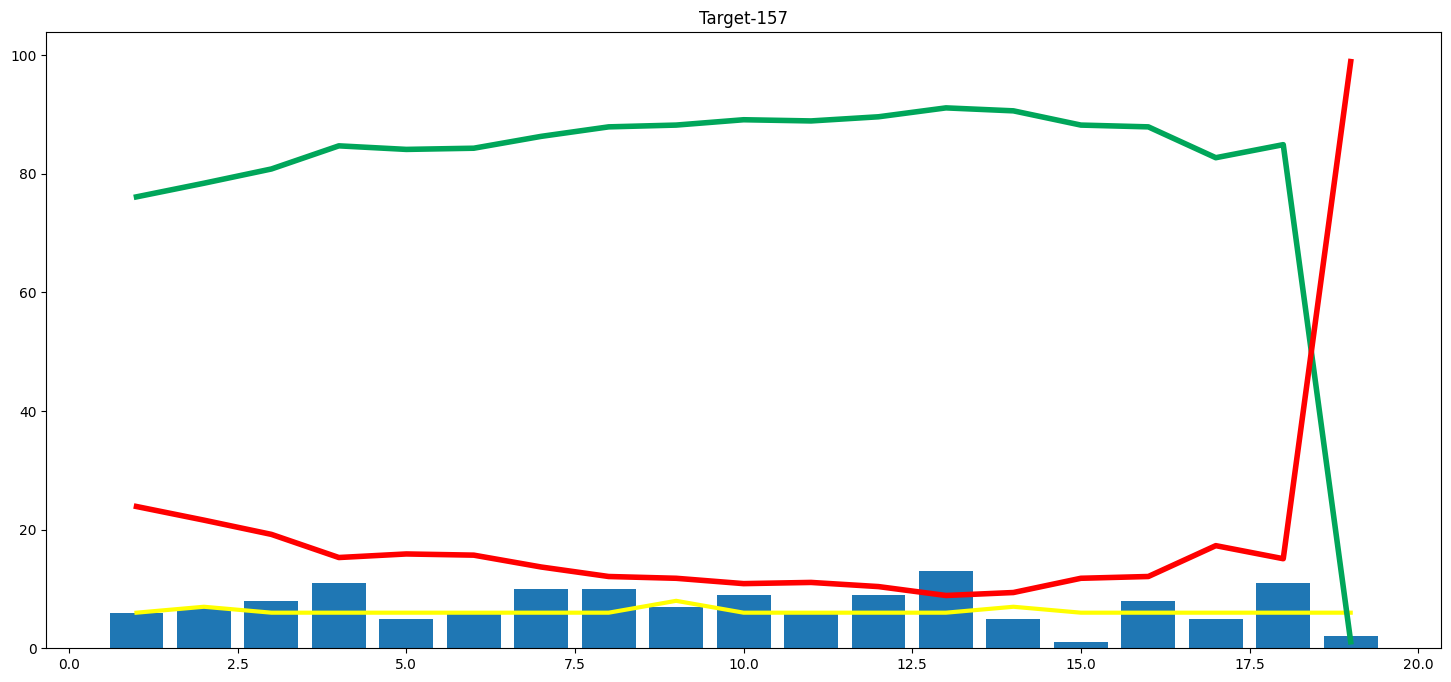

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [1]:
# delivery_df['city'].unique()

In [ ]:
# import pickle
# pickle.dump(pipe,open('pipe.pkl','wb'))